<p align="right">
Ester Luengo Rodríguez  
</p>

# Actividad 1 - _From reads to gene counts_

## Análisis transcriptómicos de la expresión génica

Pregunta 7. Finalmente, ejecuta el recuento de los alineamientos sobre el archivo BAM con htseq-count. Reporta los comandos utilizados y computa sobre el archivo tsv final, el porcentaje total de lecturas asignadas, no_feature, ambiguous, too_low_aQual y not_aligned. Una vez computado estos porcentajes, muéstralos con un gráfico (usando cualquier lenguaje de programación) y comenta brevemente su resultado. ¿Son porcentajes esperados en un experimento de ARN-seq?


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

En primer lugar, hay que obtener el archivo .tsv como un dataframe para poder trabajar con él. Gracias a la librería de pandas, existe un método con el que poder extraer esta información. Este método entiende que la primera fila corresponde a las etiquetas de las columnas, pero en este caso no es así. Como no queremos perder información, le indicamos explícitamente con `names` las etiquetas. Asimismo, para que pueda leer concretamente archivos .tsv, hay que indicar que el separador en este caso es un tabulador.

In [33]:
col_names=["Gene_id", "Counts"]
df_counts = pd.read_csv("SRR1552444_counts.tsv", sep="\t", names=col_names)

El siguiente paso es extraer del dataframe los datos de no_feature, ambiguous, too_low_aQual y not_aligned.

In [34]:
print(df_counts.iloc[-5:,])

                      Gene_id   Counts
48440            __no_feature  2342826
48441             __ambiguous  1002121
48442         __too_low_aQual  3261453
48443           __not_aligned   817651
48444  __alignment_not_unique        0


De estas últimas cinco filas, la última no nos interesa, por lo que la excluimos del subsetting.

In [35]:
df_stats = df_counts.iloc[-5:-1,1]
print(df_stats)

48440    2342826
48441    1002121
48442    3261453
48443     817651
Name: Counts, dtype: int64


Para calcular el porcentaje, hay que calcular el total de lecturas, es decir, la suma de la columna `Counts`.

In [36]:
total_counts = df_counts.iloc[:,1].sum()

Ahora, creamos el dataframe con los porcentajes.

In [37]:
df_percentage = pd.DataFrame({
        "Stats": ["Sin feature", "Ambigüo", "Baja calidad", "Sin alinear"],
        "Percentage": (df_stats.iloc[:,]/total_counts)*100
    })
print(df_percentage)

              Stats  Percentage
48440   Sin feature    8.395191
48441       Ambigüo    3.590961
48442  Baja calidad   11.686963
48443   Sin alinear    2.929939


Nos queda una última fila que debemos añadir: las lecturas alineadas. Estas serían la suma total de la columna `Counts` excluyendo las últimas filas de estadísticas.
Para añadir una fila, debemos especificar en qué índice colocarla. Para colocarla al final, con `len(df)` obtenemos el número de filas, es decir, el último índice. En una lista, el primer elemento corresponde a la primera columna y el segundo, a la segunda.

In [38]:
df_percentage.loc[len(df_percentage)] = ["Lecturas alineadas", df_counts.iloc[:-5,1].sum()/total_counts*100]
print(df_percentage)

                    Stats  Percentage
48440         Sin feature    8.395191
48441             Ambigüo    3.590961
48442        Baja calidad   11.686963
48443         Sin alinear    2.929939
4      Lecturas alineadas   73.396946


Una vez obtenido el dataframe, hay que crear un gráfico. Para ello, usamos la librería MatPlotLib. En primer lugar hay que crear el gráfico, en este caso de quesitos. Luego, modificar la estética del gráfico y guardarlo como una imagen. El último paso siempre debe ser `plt.show()`.

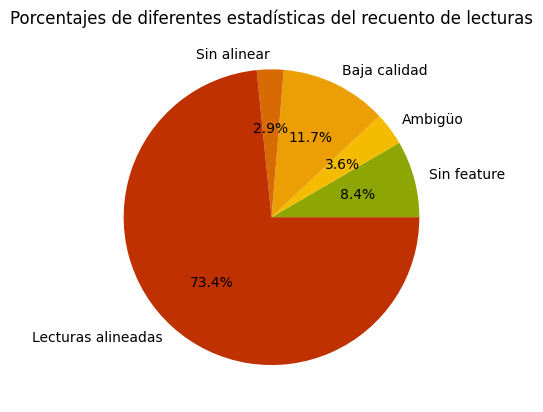

In [45]:
plt.pie(
        df_percentage.iloc[:,1],            # valores eje x
        labels = df_percentage.iloc[:,0],   # etiquetas de los datos
        autopct='%1.1f%%',                  # muestra el porcentaje con un decimal usando esta cadena de formato: "%1.1f%"
        colors=["#8EA604", "#F5BB00", "#EC9F05", "#D76A03", "#BF3100"],  # colores con HEX code (generados aleatoriamente en https://coolors.co/)
    )


plt.title("Porcentajes de diferentes estadísticas del recuento de lecturas")
# Elimina la leyenda (muy grande e innecesaria)
plt.legend().remove()

# Guarda el gráfico como una imagen
plt.savefig("SRR1552444_counts_plot.svg")

plt.show()